<a href="https://colab.research.google.com/github/FREDY129053/AI_Systems_LABS/blob/main/Lab_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейная регрессия

## Получение данных

In [1]:
import kagglehub

# Download latest version
path_to_ds = kagglehub.dataset_download("harlfoxem/housesalesprediction")
print("Path to dataset files:", path_to_ds)

Using Colab cache for faster access to the 'housesalesprediction' dataset.
Path to dataset files: /kaggle/input/housesalesprediction


## Практические задания

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(path_to_ds + '/kc_house_data.csv', parse_dates=["date"])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df_copy = df.copy()

### Выполните предобработку данных

Удаляем сходу не нужный признак

In [ ]:
df_copy = df_copy.drop(['id'], axis = 1)

Смотрим по столбцам есть ли пустые значения

In [ ]:
df_copy.isna().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


Проверяем дубликаты в данных

In [ ]:
duplicates = df_copy[df_copy.duplicated()]
len(duplicates)

0

Немного описательной статистики признаков

In [ ]:
df_copy[:].describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


Смотрим распределение домов про году ремонта

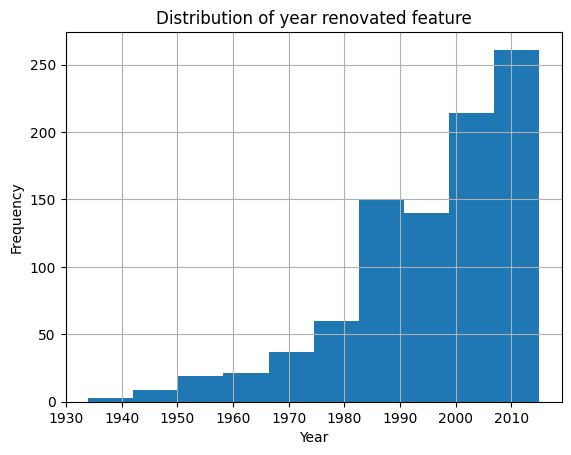

In [ ]:
import matplotlib.pyplot as plt

df_copy[df_copy['yr_renovated'] > 1900]['yr_renovated'].hist()
plt.xlabel("Year")
plt.ylabel('Frequency')
plt.title("Distribution of year renovated feature")
plt.show()

Преобразуем признак 'yr_renovated' в категориальную

In [ ]:
def renovation_feature(df):
    '''Создаем фичу был ли отремонтирован после 1990 и удаляем оригинальную фичу'''
    df['was_renovated_post90'] = df['yr_renovated'].map(lambda x: 1 if x > 1990 else 0)
    df = df.drop('yr_renovated', axis = 1)
    return df

df_copy = renovation_feature(df_copy)

Смотрим распределение домов по году строительства

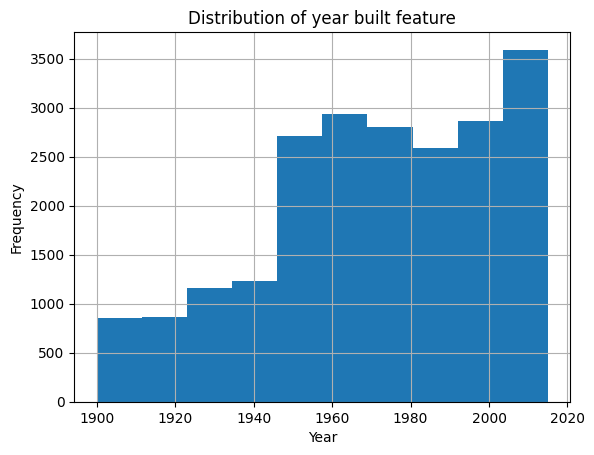

In [ ]:
df_copy['yr_built'].hist()
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of year built feature')
plt.show()

Преобразуем признак 'yr_built' в категории

In [ ]:
def year_built(df):
    '''Категизируем фичу год строительства'''

    yr_built_bins = [1899, 1950, 1975, 1997, 2016]
    yr_built_labels = ['pre1950', '1950_to_1975', '1975_to_1997', '1997_to_2015']

    df['yr_built'] = pd.cut(df['yr_built'], bins = yr_built_bins, labels = yr_built_labels)

    return df

df_copy = year_built(df_copy)

Преобразуем фичу площадь подвала в его наличие

In [ ]:
def has_basement(df):
    '''Создаем фичу есть ли подвал'''
    df['has_basement'] = df['sqft_basement'].map(lambda x: 1 if x > 0 else 0)
    df = df.drop('sqft_basement', axis = 1)
    return df

df_copy = has_basement(df_copy)

Признак 'viewed' показывает, просматривался дом или нет

In [ ]:
def viewed(df):
    '''Создаем фичу оценки, т.к. 0 преобладает в оригинальной фиче'''
    df['viewed'] = df['view'].map(lambda x: 1 if x > 0 else 0)
    df = df.drop('view', axis = 1)
    return df

df_copy = viewed(df_copy)

Округление числа ванных комнат

In [ ]:
def round_bathrooms(df):
    '''Округляем кол-во ванных'''
    df['bathrooms'] = df['bathrooms'].map(lambda x: int(round(x,0)))
    return df

df_copy = round_bathrooms(df_copy)

In [ ]:
df_copy.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated_post90,has_basement,viewed
0,2014-10-13,221900.0,3,1,1180,5650,1.0,0,3,7,1180,1950_to_1975,98178,47.5112,-122.257,1340,5650,0,0,0
1,2014-12-09,538000.0,3,2,2570,7242,2.0,0,3,7,2170,1950_to_1975,98125,47.7210,-122.319,1690,7639,1,1,0
2,2015-02-25,180000.0,2,1,770,10000,1.0,0,3,6,770,pre1950,98028,47.7379,-122.233,2720,8062,0,0,0
3,2014-12-09,604000.0,4,3,1960,5000,1.0,0,5,7,1050,1950_to_1975,98136,47.5208,-122.393,1360,5000,0,1,0
4,2015-02-18,510000.0,3,2,1680,8080,1.0,0,3,8,1680,1975_to_1997,98074,47.6168,-122.045,1800,7503,0,0,0


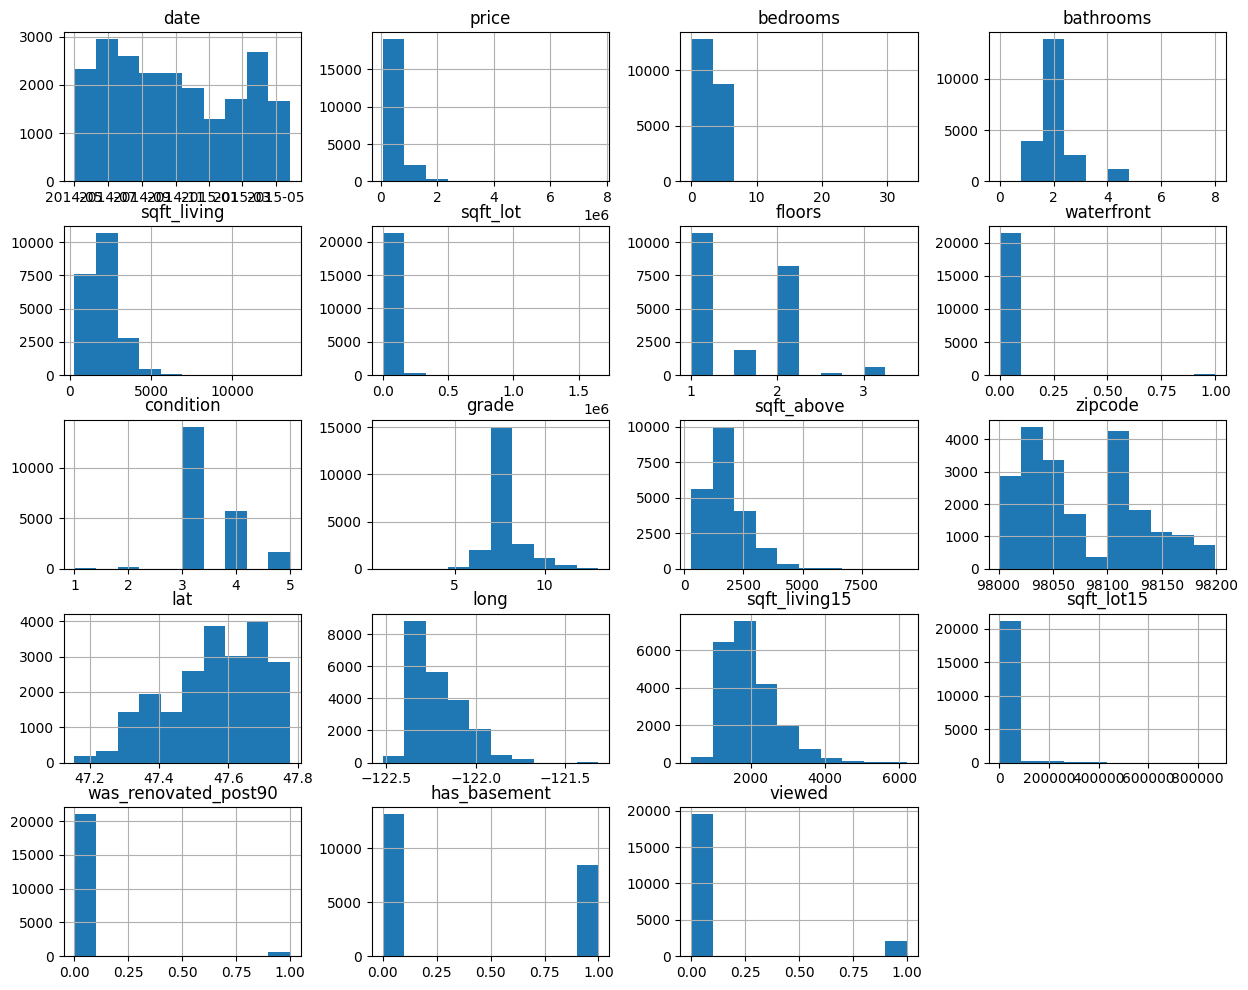

In [ ]:
df_copy.hist(figsize = (15,12))
plt.show()

Изучаем возможные выбросы в данных

In [ ]:
# Посмотрим на возможные выбросы
df_copy['bedrooms'].value_counts()

,count
bedrooms,
3,9824
4,6882
2,2760
5,1601
6,272
1,199
7,38
0,13
8,13


33 спальни? чья-то шутка видать, особенно если на другие характеристики посмотреть дома

In [ ]:
display(df_copy[df_copy['bedrooms'] == 33])
# Наверное хотели написать 3, а не 33
df_copy.loc[15870, 'bedrooms'] = 3

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated_post90,has_basement,viewed
15870,2014-06-25,640000.0,33,2,1620,6000,1.0,0,5,7,1040,pre1950,98103,47.6878,-122.331,1330,4700,0,1,0


In [ ]:
def remove_outliers(df):
    '''Убираем данные, которые отличаются в 3 раза от стандарта каждой нужной колнки'''
    variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
                 'lat', 'long', 'sqft_living15', 'sqft_lot15']

    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]

    return df

print(f"DF перед очисткой выбросов: {df_copy.shape}")
df_copy = remove_outliers(df_copy)
print(f"DF после очистки выбросов: {df_copy.shape}")

DF перед очисткой выбросов: (21613, 20)
DF после очистки выбросов: (20058, 20)


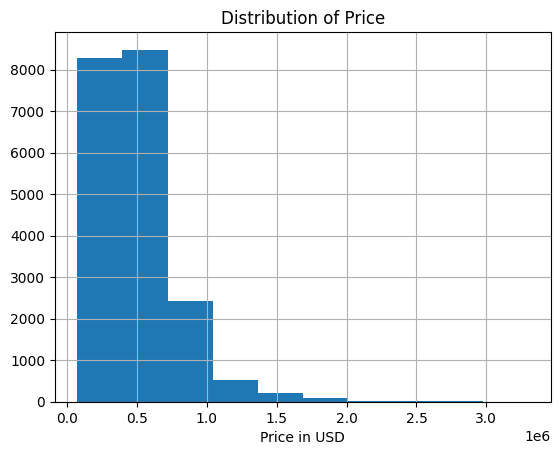

In [ ]:
df_copy['price'].hist()
plt.xlabel('Price in USD')
plt.title('Distribution of Price')
plt.show()

In [ ]:
df['price'].describe()

,price
count,2.161300e+04
mean,5.400881e+05
std,3.671272e+05
min,7.500000e+04
25%,3.219500e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


In [ ]:
for i in range (90,100):
    q = i/100
    quantile = df['price'].quantile(q = q)
    print(f'{q} percentile: {round(quantile,3)}')

0.9 percentile: 887000.0
0.91 percentile: 919999.2
0.92 percentile: 950000.0
0.93 percentile: 998000.0
0.94 percentile: 1063560.0
0.95 percentile: 1156480.0
0.96 percentile: 1259040.0
0.97 percentile: 1388000.0
0.98 percentile: 1600000.0
0.99 percentile: 1964400.0


Удаляем дома стоимостью > 1965000, это какие-то очень уникальные дома и будут мешать простой регрессии

In [ ]:
df_copy = df_copy[df_copy['price']<1965000]

Создаем фичу месяц продажи

In [ ]:
def sale_month_feature(df):
    df['sale_month'] = pd.DatetimeIndex(df['date']).month
    return df

df_copy = sale_month_feature(df_copy)

Смотрим на корреляцию признаков

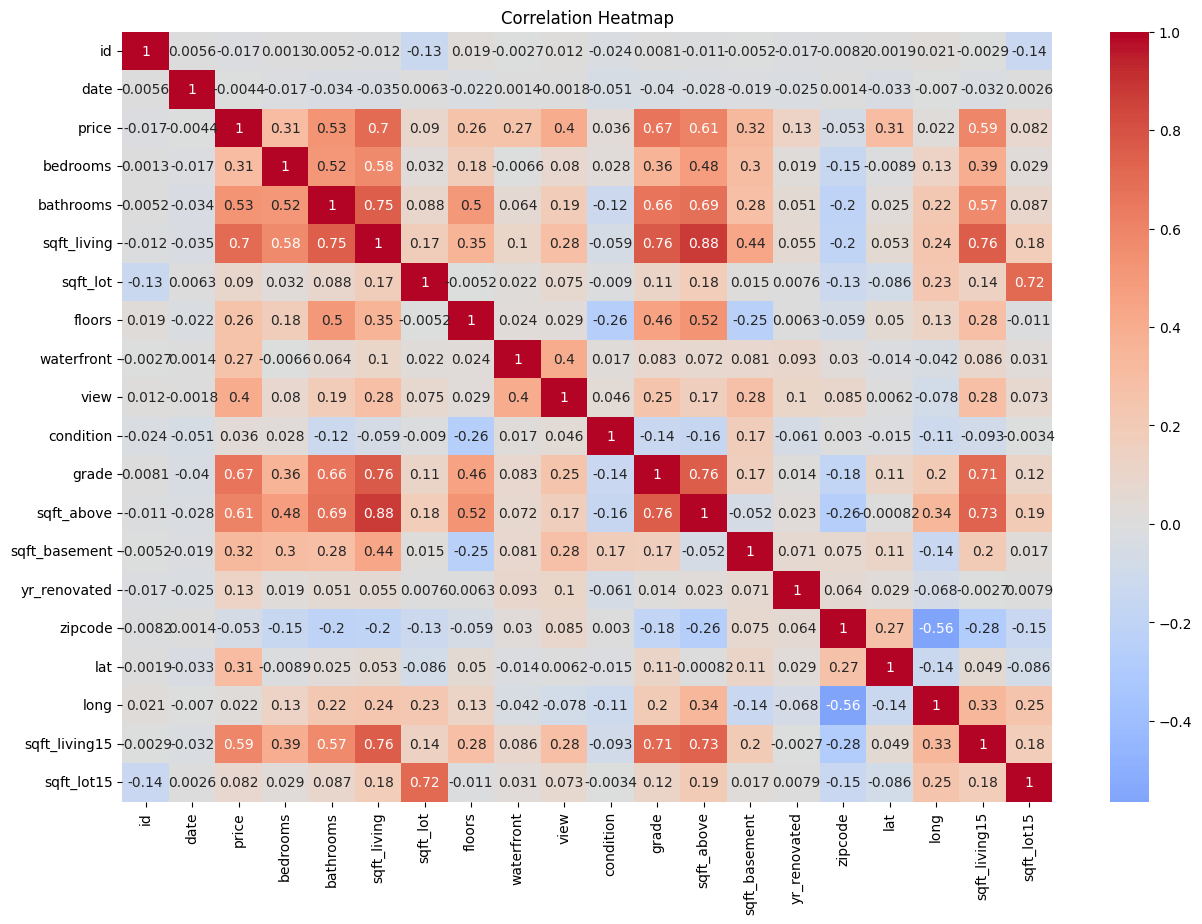

In [ ]:
import seaborn as sns

corr = df.loc[:, df.columns != 'yr_built'].corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Признаки с высокой корреляцией удаляем

In [ ]:
def drop_corrfeats(df):
    '''Удаляем сильно коррелирующие фичи'''
    df = df.drop(['sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)
    return df

df_copy = drop_corrfeats(df_copy)

In [ ]:
df_copy.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,was_renovated_post90,has_basement,viewed,sale_month
0,2014-10-13,221900.0,3,1,1180,5650,1.0,0,3,7,1950_to_1975,98178,47.5112,-122.257,0,0,0,10
1,2014-12-09,538000.0,3,2,2570,7242,2.0,0,3,7,1950_to_1975,98125,47.7210,-122.319,1,1,0,12
2,2015-02-25,180000.0,2,1,770,10000,1.0,0,3,6,pre1950,98028,47.7379,-122.233,0,0,0,2
3,2014-12-09,604000.0,4,3,1960,5000,1.0,0,5,7,1950_to_1975,98136,47.5208,-122.393,0,1,0,12
4,2015-02-18,510000.0,3,2,1680,8080,1.0,0,3,8,1975_to_1997,98074,47.6168,-122.045,0,0,0,2


OHE года постройки(категориальная фича)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)

encoded_features = ohe.fit_transform(df_copy[['yr_built']])

encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(['yr_built']), index=df_copy.index)

df_copy = pd.concat([df_copy.drop('yr_built', axis=1), encoded_df], axis=1)

In [ ]:
df_copy.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,lat,long,was_renovated_post90,has_basement,viewed,sale_month,yr_built_1950_to_1975,yr_built_1975_to_1997,yr_built_1997_to_2015,yr_built_pre1950
0,2014-10-13,221900.0,3,1,1180,5650,1.0,0,3,7,...,47.5112,-122.257,0,0,0,10,1.0,0.0,0.0,0.0
1,2014-12-09,538000.0,3,2,2570,7242,2.0,0,3,7,...,47.7210,-122.319,1,1,0,12,1.0,0.0,0.0,0.0
2,2015-02-25,180000.0,2,1,770,10000,1.0,0,3,6,...,47.7379,-122.233,0,0,0,2,0.0,0.0,0.0,1.0
3,2014-12-09,604000.0,4,3,1960,5000,1.0,0,5,7,...,47.5208,-122.393,0,1,0,12,1.0,0.0,0.0,0.0
4,2015-02-18,510000.0,3,2,1680,8080,1.0,0,3,8,...,47.6168,-122.045,0,0,0,2,0.0,1.0,0.0,0.0


Удаляем ненужные данные для обучения

In [ ]:
drop_cols = ['date', 'zipcode']
df_copy.drop(columns=drop_cols, axis=1, inplace=True)

In [ ]:
df_copy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,lat,long,was_renovated_post90,has_basement,viewed,sale_month,yr_built_1950_to_1975,yr_built_1975_to_1997,yr_built_1997_to_2015,yr_built_pre1950
0,221900.0,3,1,1180,5650,1.0,0,3,7,47.5112,-122.257,0,0,0,10,1.0,0.0,0.0,0.0
1,538000.0,3,2,2570,7242,2.0,0,3,7,47.7210,-122.319,1,1,0,12,1.0,0.0,0.0,0.0
2,180000.0,2,1,770,10000,1.0,0,3,6,47.7379,-122.233,0,0,0,2,0.0,0.0,0.0,1.0
3,604000.0,4,3,1960,5000,1.0,0,5,7,47.5208,-122.393,0,1,0,12,1.0,0.0,0.0,0.0
4,510000.0,3,2,1680,8080,1.0,0,3,8,47.6168,-122.045,0,0,0,2,0.0,1.0,0.0,0.0


### Обучение моделей

Разделение данных

In [ ]:
X = df_copy.drop('price', axis=1)
Y = df_copy['price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.2, random_state=42
)

Стандартизируем признаки

In [ ]:
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

#### Linear Regressionы

Обычная

In [ ]:
from sklearn.linear_model import LinearRegression

model_base = LinearRegression()
model_base.fit(X_train_scale, y_train)

LinearRegression()

Гребневая aplha = 3

In [ ]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=3)
model_ridge.fit(X_train_scale, y_train)

Ridge(alpha=3)

Лассо alpha = 120

In [ ]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=120)
model_lasso.fit(X_train_scale, y_train)

Lasso(alpha=120)

Качества регрессий

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

def print_res(name, y_pred, y_test):
  print(
    f"RMSE {name} = {np.sqrt(mean_squared_error(y_test, y_pred))} | R^2 {name} = {r2_score(y_test, y_pred)}"
  )

model_base_predict = model_base.predict(X_test_scale)
model_ridge_predict = model_ridge.predict(X_test_scale)
model_lasso_predict = model_lasso.predict(X_test_scale)

print_res("Линейной регресии", model_base_predict, y_test)
print_res("Гребневой регресии(a=3)", model_ridge_predict, y_test)
print_res("Лассо регресии(a=120)", model_lasso_predict, y_test)

RMSE Линейной регресии = 146542.9953665209 | R^2 Линейной регресии = 0.6857296241883841
RMSE Гребневой регресии(a=3) = 146542.61737971814 | R^2 Гребневой регресии(a=3) = 0.6857312454177176
RMSE Лассо регресии(a=120) = 146543.49872497708 | R^2 Лассо регресии(a=120) = 0.6857274652189638


In [ ]:
from prettytable import PrettyTable

cols = X_test.columns
table = PrettyTable()
table.field_names = ["Коэффициенты", "Линейная регрессия", "Гребневая регрессия(a=3)", "Лассов(a=120)"]

for i in range(len(cols)):
  table.add_row([cols[i], model_base.coef_[i], model_ridge.coef_[i], model_lasso.coef_[i]])

print(table)

+-----------------------+---------------------+--------------------------+---------------------+
|      Коэффициенты     |  Линейная регрессия | Гребневая регрессия(a=3) |    Лассов(a=120)    |
+-----------------------+---------------------+--------------------------+---------------------+
|        bedrooms       | -13595.836420526875 |   -13577.038150033033    | -13187.384980784522 |
|       bathrooms       |  15297.643152614924 |    15303.319565053926    |  15042.778446089023 |
|      sqft_living      |  92248.00621070233  |     92219.501167668      |  91973.68579920194  |
|        sqft_lot       |  -4272.342188601797 |    -4263.355837614698    | -4014.4149890887647 |
|         floors        |  7603.195004306802  |    7608.599626822282     |  7304.994416846931  |
|       waterfront      |  26413.189728465335 |     26409.2805074915     |  26321.53135153556  |
|       condition       |  22874.19243417771  |    22872.468272371774    |  22824.002553511982 |
|         grade         |  108

Крутой пример подготовки данных: https://github.com/nadinezab/kc-house-prices-prediction/blob/master/kc-house-prices.ipynb

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_scaler = PolynomialFeatures(degree=3)
scaler = StandardScaler()

X_poly = poly_scaler.fit_transform(X)

X_scaled = scaler.fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(
  X_scaled, Y, test_size=0.2, random_state=42
)

model_base2 = LinearRegression()
model_base2.fit(X_train, y_train)
model_ridge2 = Ridge(alpha=3)
model_ridge2.fit(X_train, y_train)
model_lasso2 = Lasso(alpha=120)
model_lasso2.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.583e+13, tolerance: 1.099e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=120)

In [ ]:
def print_res(name, y_pred, y_test):
  print(
    f"RMSE {name} = {np.sqrt(mean_squared_error(y_test, y_pred))} | R^2 {name} = {r2_score(y_test, y_pred)}"
  )

model_base_predict = model_base2.predict(X_test)
model_ridge_predict = model_ridge2.predict(X_test)
model_lasso_predict = model_lasso2.predict(X_test)

print_res("Линейной регресии", model_base_predict, y_test)
print_res("Гребневой регресии(a=3)", model_ridge_predict, y_test)
print_res("Лассо регресии(a=120)", model_lasso_predict, y_test)

# degree = 2 | MinMax | X_test = 190 features
# RMSE Линейной регресии = 130796.70536416663 | R^2 Линейной регресии = 0.7496388570375293
# RMSE Гребневой регресии(a=3) = 139027.81297716024 | R^2 Гребневой регресии(a=3) = 0.7171366384820598
# RMSE Лассо регресии(a=120) = 141359.60372878748 | R^2 Лассо регресии(a=120) = 0.7075686330987414

# degree = 3 | MinMax | X_test = 1330 features
# RMSE Линейной регресии = 182057.8204343299 | R^2 Линейной регресии = 0.5149438733767684
# RMSE Гребневой регресии(a=3) = 137606.92200145026 | R^2 Гребневой регресии(a=3) = 0.7228889286112897
# RMSE Лассо регресии(a=120) = 139476.2929017218 | R^2 Лассо регресии(a=120) = 0.7153087574519423

# degree = 2 | Standard | X_test = 190 features
# RMSE Линейной регресии = 130796.70536419087 | R^2 Линейной регресии = 0.7496388570374365
# RMSE Гребневой регресии(a=3) = 137504.22942116277 | R^2 Гребневой регресии(a=3) = 0.723302376308085
# RMSE Лассо регресии(a=120) = 137951.6722123751 | R^2 Лассо регресии(a=120) = 0.7214986820894391

# degree = 3 | Standard | X_test = 1330 features
# RMSE Линейной регресии = 236139.28181060986 | R^2 Линейной регресии = 0.1839631095628672
# RMSE Гребневой регресии(a=3) = 145847.7182078356 | R^2 Гребневой регресии(a=3) = 0.6887046781917274
# RMSE Лассо регресии(a=120) = 139413.46394584092 | R^2 Лассо регресии(a=120) = 0.7155651856156087

RMSE Линейной регресии = 236139.28181060986 | R^2 Линейной регресии = 0.1839631095628672
RMSE Гребневой регресии(a=3) = 145847.7182078356 | R^2 Гребневой регресии(a=3) = 0.6887046781917274
RMSE Лассо регресии(a=120) = 139413.46394584092 | R^2 Лассо регресии(a=120) = 0.7155651856156087


## Тест учебника. Draw

In [33]:
df_copy2 = df_copy.copy()
df_copy2.drop(['id', 'date', 'sqft_basement', 'lat', 'long'], axis=1, inplace=True)
print(df_copy2.shape)

(21613, 16)


In [34]:
import pandas as pd

cat_cols = ['floors', 'view', 'condition', 'grade', 'bedrooms', 'bathrooms', 'zipcode']
for c in cat_cols:
  dummies = pd.get_dummies(df_copy2[c], drop_first=False)
  dummies = dummies.add_prefix("{}#".format(c))
  df_copy2 = df_copy2.join(dummies)
df_copy2.drop(cat_cols, axis=1, inplace=True)
print(df_copy2.shape)

(21613, 150)


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_copy2.drop('price', axis=1)
Y = df_copy2['price']
# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
  X, Y, test_size=0.2, random_state=42
)

scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression

model_base = LinearRegression()
model_base.fit(X_train_scale, y_train)

from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=3)
model_ridge.fit(X_train_scale, y_train)

from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=120)
model_lasso.fit(X_train_scale, y_train)

Lasso(alpha=120)

In [37]:
from sklearn.metrics import r2_score, mean_squared_error

def print_res(name, y_pred, y_test):
  print(
    f"RMSE {name} = {np.sqrt(mean_squared_error(y_test, y_pred))} | R^2 {name} = {r2_score(y_test, y_pred)}"
  )

model_base_predict = model_base.predict(X_test_scale)
model_ridge_predict = model_ridge.predict(X_test_scale)
model_lasso_predict = model_lasso.predict(X_test_scale)

print_res("Линейной регресии", model_base_predict, y_test)
print_res("Гребневой регресии(a=3)", model_ridge_predict, y_test)
print_res("Лассо регресии(a=120)", model_lasso_predict, y_test)

# Я
# RMSE Линейной регресии = 146542.9953665209 | R^2 Линейной регресии = 0.6857296241883841
# RMSE Гребневой регресии(a=3) = 146542.61737971814 | R^2 Гребневой регресии(a=3) = 0.6857312454177176
# RMSE Лассо регресии(a=120) = 146543.49872497708 | R^2 Лассо регресии(a=120) = 0.6857274652189638

# Учебник
# RMSE Линейной регресии = 170505.34432576515 | R^2 Линейной регресии = 0.8076947698515042
# RMSE Гребневой регресии(a=3) = 170506.5595244066 | R^2 Гребневой регресии(a=3) = 0.8076920287070772
# RMSE Лассо регресии(a=120) = 170535.5638705919 | R^2 Лассо регресии(a=120) = 0.8076265973078688

RMSE Линейной регресии = 170505.34432576515 | R^2 Линейной регресии = 0.8076947698515042
RMSE Гребневой регресии(a=3) = 170506.5595244066 | R^2 Гребневой регресии(a=3) = 0.8076920287070772
RMSE Лассо регресии(a=120) = 170535.5638705919 | R^2 Лассо регресии(a=120) = 0.8076265973078688


In [40]:
from prettytable import PrettyTable

cols = X_test.columns
table = PrettyTable()
table.field_names = ["Коэффициенты", "Линейная регрессия", "Гребневая регрессия(a=3)", "Лассов(a=120)"]

for i in range(len(cols)):
  table.add_row([cols[i], model_base.coef_[i], model_ridge.coef_[i], model_lasso.coef_[i]])

print(table)

+----------------+------------------------+--------------------------+---------------------+
|  Коэффициенты  |   Линейная регрессия   | Гребневая регрессия(a=3) |    Лассов(a=120)    |
+----------------+------------------------+--------------------------+---------------------+
|  sqft_living   |   99861.87373979695    |    99772.60115565553     |  100744.44974600387 |
|    sqft_lot    |    9924.68048612916    |     9920.05220011333     |  9400.146500934334  |
|   waterfront   |   46494.20941828744    |    46484.38627860147     |  46360.249130512995 |
|   sqft_above   |   32946.63611453482    |    32984.61092556884     |  31936.378799614657 |
|    yr_built    |   -4828.228194327448   |   -4854.1632100743045    |  -5247.893738900111 |
|  yr_renovated  |   11818.020980440564   |    11815.82498766522     |  11690.961653216966 |
| sqft_living15  |    15921.5208150607    |    15945.974394093224    |  15987.991374146004 |
|   sqft_lot15   |  -2886.3259917746363   |   -2884.4814831416593    |